In [66]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import src.lstm_helper as lh
import src.time_series_helpers as th

### compairson by total

In [47]:
ls data/

LSTM_10_output_forecast.csv  sample_submission.csv
LSTM_500_by_item.csv         sample_valid.csv
LSTM_500_forecast.csv        store_item.csv
VAR_by_item.csv              test.csv
VAR_forecast.csv             train.csv
lstm_10_by_item.csv          vcr_by_item.csv
lstm_data.csv                vcr_forecast.csv
processed_train.csv


In [48]:
# load sample valid dataset
valid_path ='data/sample_valid.csv'
valid = lh.load_data(valid_path)

# load Forecasting
VAR_path = 'data/VAR_forecast.csv'
VAR_forcast=lh.load_data(VAR_path)

LSTM_500_output_path= 'data/LSTM_500_forecast.csv'
LSTM_500_output_forecast=lh.load_data(LSTM_500_output_path)

LSTM_10_output_path = 'data/LSTM_10_output_forecast.csv'
LSTM_10_output_forecast=lh.load_data(LSTM_10_output_path)

valid.shape

(46000, 3)

In [49]:
df_comp = pd.concat([valid,VAR_forcast,LSTM_500_output_forecast, LSTM_10_output_forecast], axis = 'columns')

In [50]:
df_comp.shape

(46000, 6)

In [51]:
df_comp.head()

,store,item,actuals,VAR_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,,,
2017-10-01,1,1,21,28.298917,19.159014,21.983830
2017-10-02,1,1,12,17.481383,19.159014,21.253641
2017-10-03,1,1,18,21.455338,19.159014,19.590227
2017-10-04,1,1,15,22.685883,19.159014,20.462664
2017-10-05,1,1,20,22.080135,19.159014,20.195715


In [52]:
#drop store, item id 
comp_data = df_comp.iloc[:,2:]
comp_data.head()

,actuals,VAR_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,
2017-10-01,21,28.298917,19.159014,21.983830
2017-10-02,12,17.481383,19.159014,21.253641
2017-10-03,18,21.455338,19.159014,19.590227
2017-10-04,15,22.685883,19.159014,20.462664
2017-10-05,20,22.080135,19.159014,20.195715


In [53]:
#calculate the RMSE by model
df_rmses =th.rmse_comp(comp_data)

In [54]:
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,LSTM_500_output_forecast,35.250000
2,LSTM_10_output_forecast,35.170000
3,VAR_forecast,35.000000


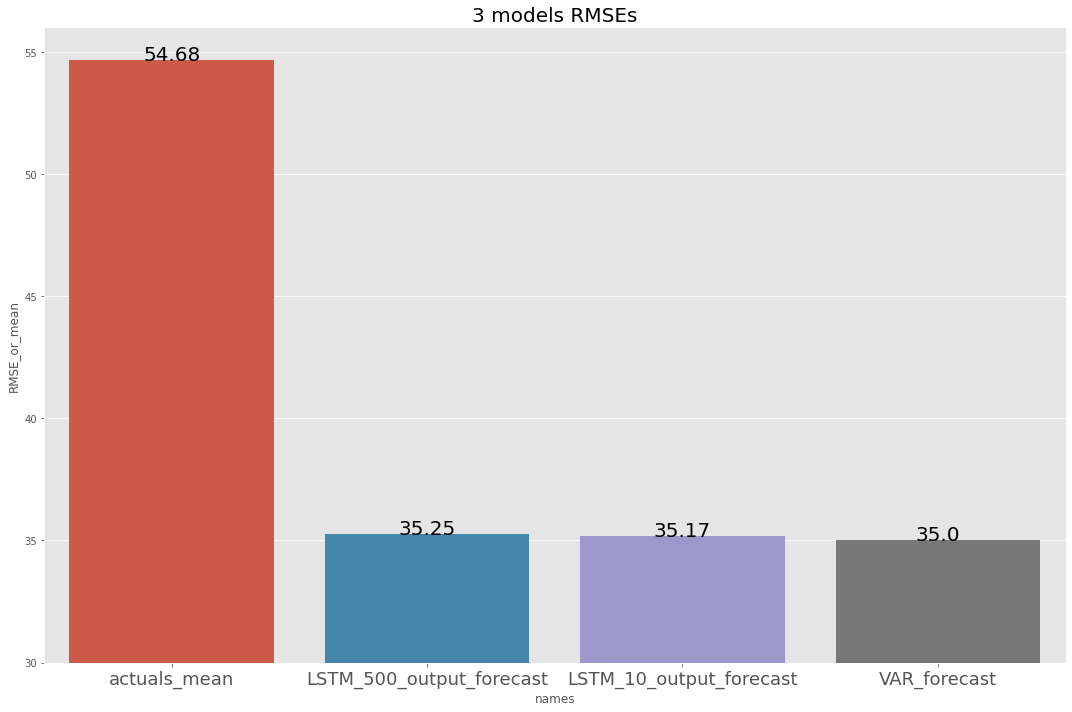

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data=df_rmses,x="names", y="RMSE_or_mean")
ax.set_ylim(30,56)
ax.set_title('3 models RMSEs',fontsize=20)
for index, row in df_rmses.iterrows():
    ax.text(row.name,row.RMSE_or_mean, round(row.RMSE_or_mean,2), color='black', ha="center",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tight_layout()
plt.savefig('images/3_models_RMSEs.png')

### comparison by store-item

In [56]:
!ls data/

LSTM_10_output_forecast.csv sample_submission.csv
LSTM_500_by_item.csv        sample_valid.csv
LSTM_500_forecast.csv       store_item.csv
VAR_by_item.csv             test.csv
VAR_forecast.csv            train.csv
lstm_10_by_item.csv         vcr_by_item.csv
lstm_data.csv               vcr_forecast.csv
processed_train.csv


In [130]:
# load sample valid dataset
valid_path ='data/store_item.csv'
valid_item = lh.load_data(valid_path)
valid_item=valid_item[-92:]

# load Forecasting
VAR_path = 'data/VAR_by_item.csv'
VAR_item=lh.load_data(VAR_path)


LSTM_500_output_path= 'data/LSTM_500_by_item.csv'
LSTM_500_item=lh.load_data(LSTM_500_output_path)

LSTM_10_output_path = 'data/lstm_10_by_item.csv'
LSTM_10_item=lh.load_data(LSTM_10_output_path)


In [131]:
df_lst =[valid_item,LSTM_500_item,LSTM_10_item,VAR_item]
for i in df_lst:
    print(i.shape)

(92, 500)
(92, 500)
(92, 500)
(92, 500)


In [132]:
valid_item=valid_item[-92:]


In [133]:
valid_item.head()

,s1_i1,s1_i2,s1_i3,s1_i4,s1_i5,s1_i6,s1_i7,s1_i8,s1_i9,s1_i10,...,s10_i41,s10_i42,s10_i43,s10_i44,s10_i45,s10_i46,s10_i47,s10_i48,s10_i49,s10_i50
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,21,60,38,22,20,70,70,100,63,88,...,22,51,71,39,122,67,33,75,39,99
2017-10-02,12,56,32,21,15,40,44,64,39,73,...,27,38,50,35,62,51,18,48,32,71
2017-10-03,18,55,28,17,22,58,51,57,51,84,...,20,35,54,35,87,49,27,70,20,77
2017-10-04,15,55,34,24,15,61,55,61,39,62,...,27,38,56,33,106,65,26,74,39,87
2017-10-05,20,59,40,25,19,52,47,69,41,60,...,28,51,72,47,103,72,25,61,31,78


In [134]:
LSTM_500_item.head()

,s1_i1_forecast,s1_i2_forecast,s1_i3_forecast,s1_i4_forecast,s1_i5_forecast,s1_i6_forecast,s1_i7_forecast,s1_i8_forecast,s1_i9_forecast,s1_i10_forecast,...,s10_i41_forecast,s10_i42_forecast,s10_i43_forecast,s10_i44_forecast,s10_i45_forecast,s10_i46_forecast,s10_i47_forecast,s10_i48_forecast,s10_i49_forecast,s10_i50_forecast
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-02,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-03,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-04,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-05,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846


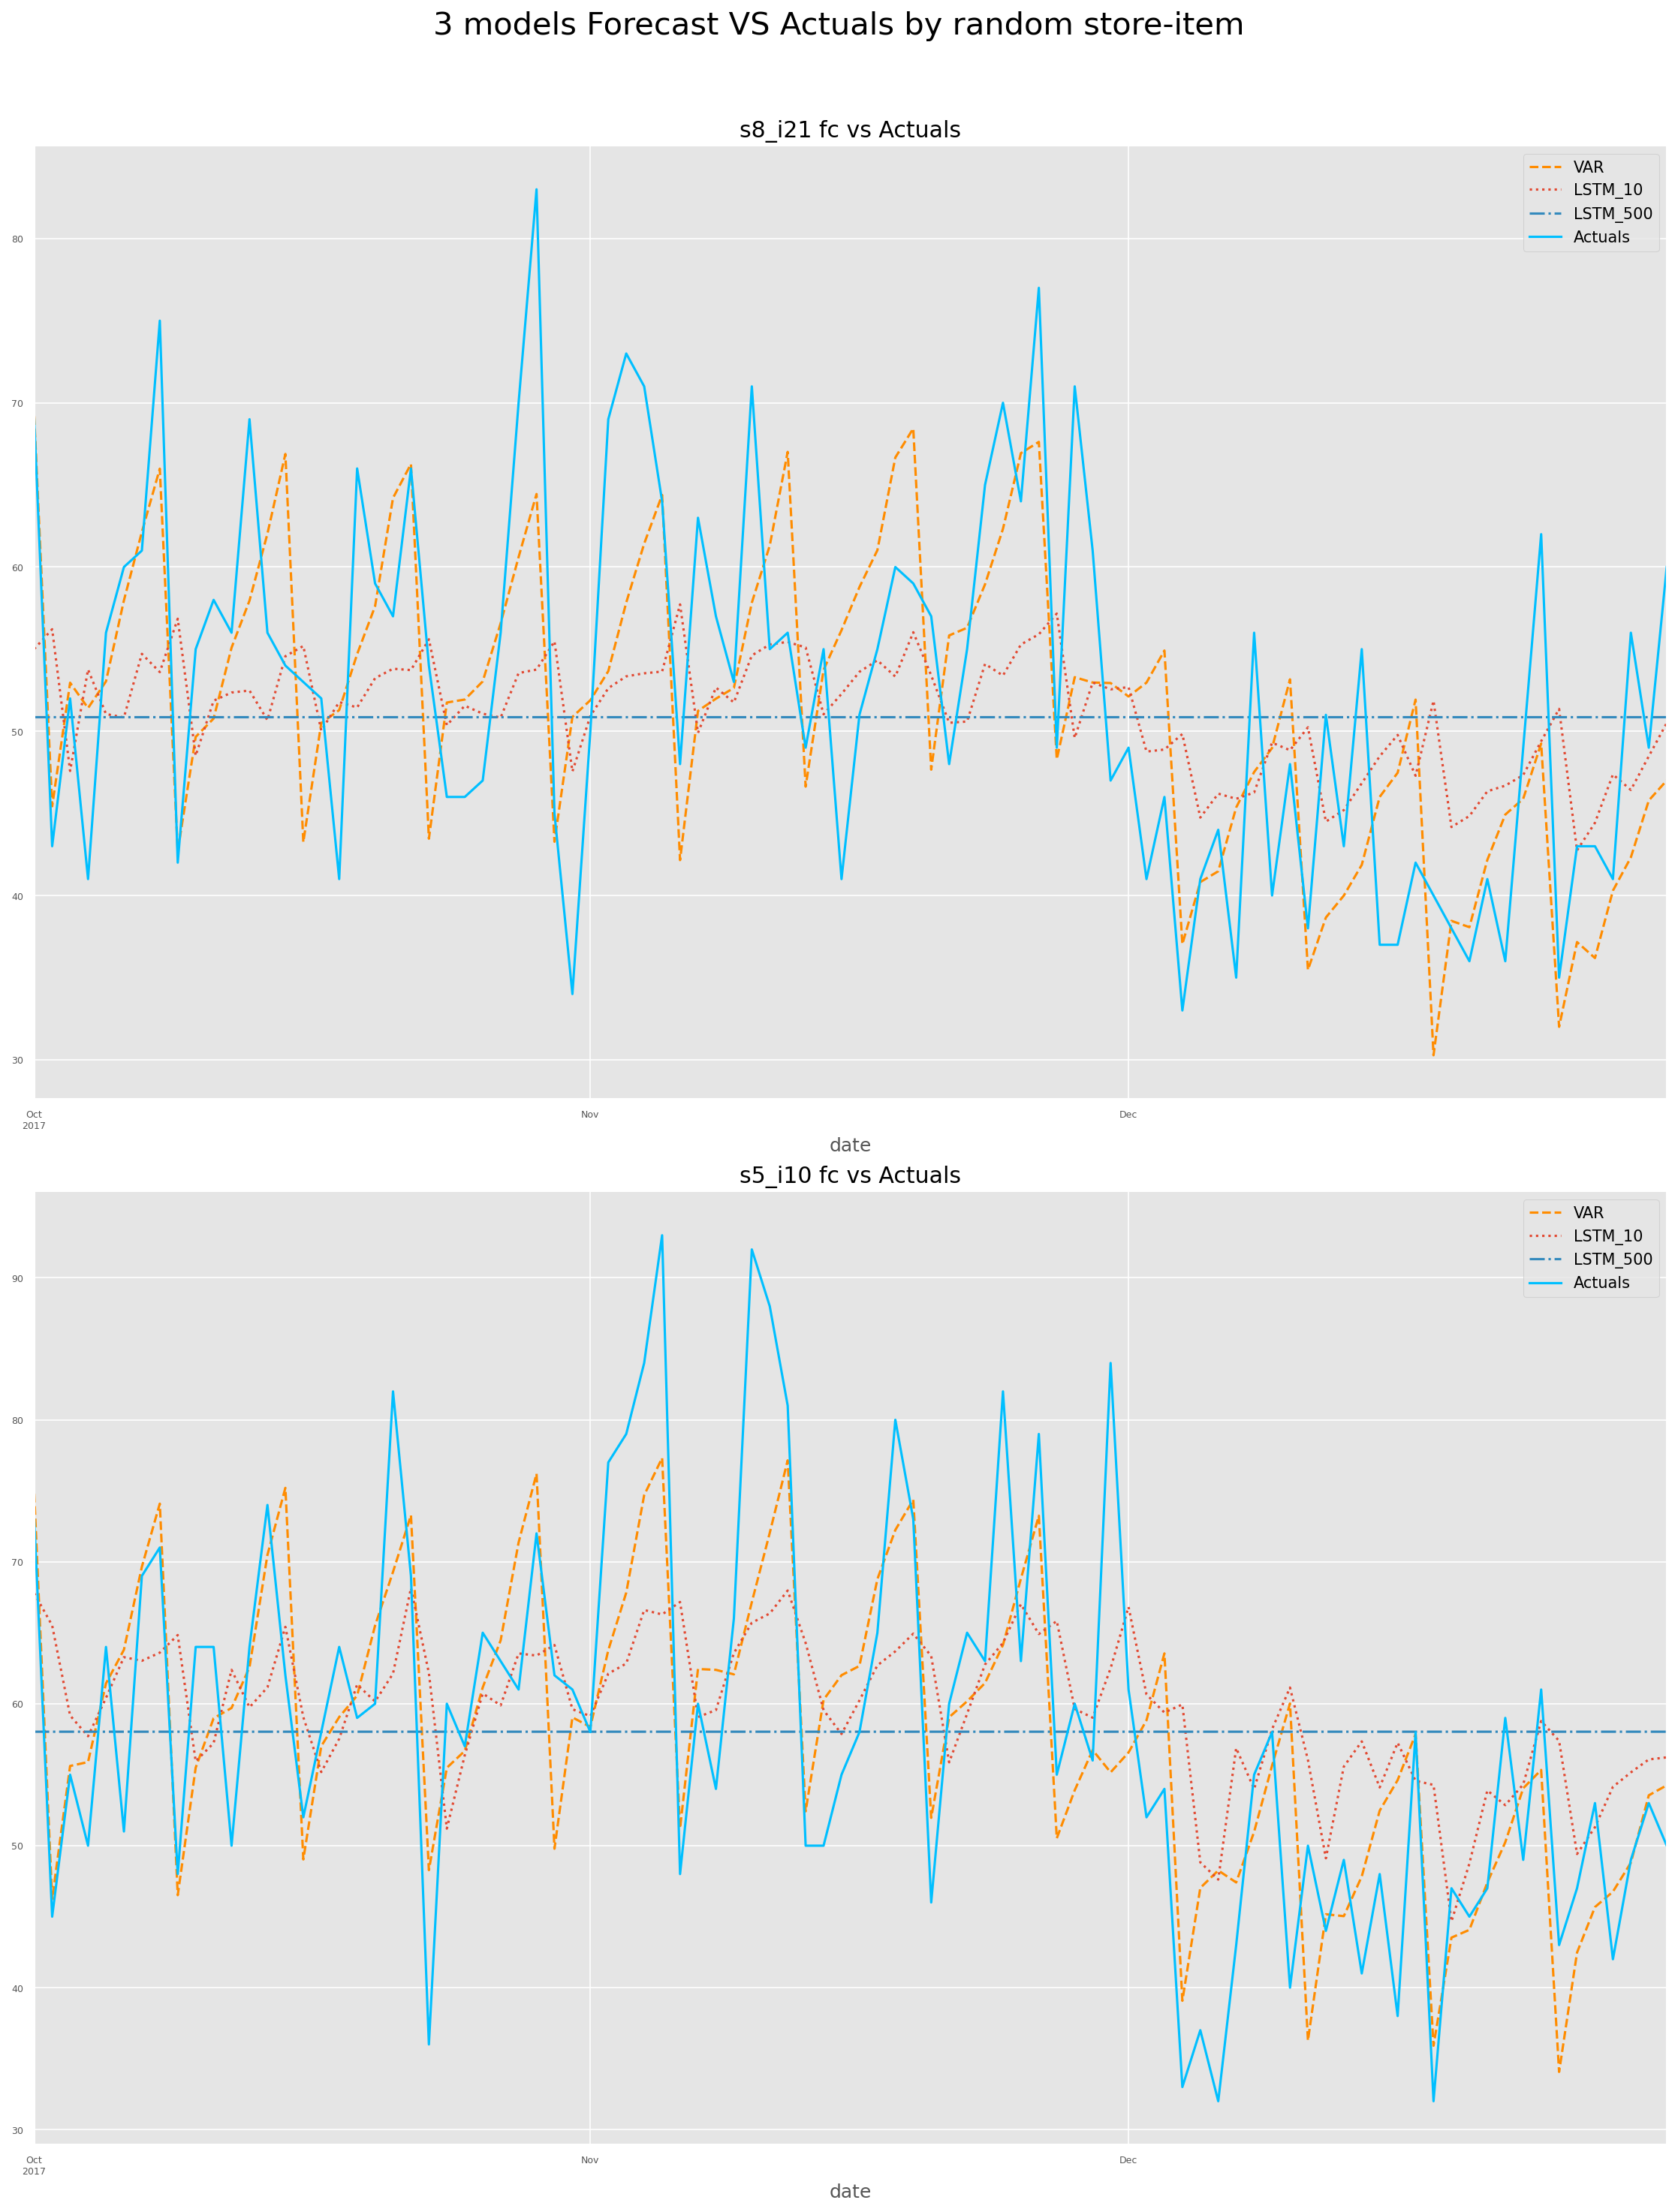

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=150, figsize=(15,20))

for i, ax in enumerate( axes.flatten()):
    col = random.randint(1,valid_item.shape[1])
    VAR_item[VAR_item.columns[col]].plot(legend=True, ax=ax,linestyle='--',color='darkorange',label='VAR').autoscale(axis='x',tight=True)
    LSTM_10_item[LSTM_10_item.columns[col]].plot(legend=True, ax=ax,linestyle=':',label='LSTM_10').autoscale(axis='x',tight=True)
    LSTM_500_item[LSTM_500_item.columns[col]].plot(legend=True, ax=ax,linestyle='-.',label='LSTM_500').autoscale(axis='x',tight=True)
    valid_item[valid_item.columns[col]].plot(legend=True, ax=ax,color='deepskyblue',label='Actuals');
    ax.set_title( f'{valid_item.columns[col]} fc vs Actuals')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)


fig.suptitle("3 models Forecast VS Actuals by random store-item", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.92);
plt.savefig('images/3_models_Forecast_VS_Actuals.png')

In [68]:
sampling = random.choices(np.arange(valid_item.shape[1]), k=5)
sampling 

[50, 38, 101, 95, 399]

In [72]:
#load comparison data
true_data = valid_item.iloc[:,sampling]
VAR_fc=VAR_item.iloc[:,sampling]
LSTM_500_fc=LSTM_500_item.iloc[:,sampling]
LSTM_10_fc = LSTM_10_output_item.iloc[:,sampling]

true_data.head()

,s2_i1,s1_i39,s3_i2,s2_i46,s8_i50
date,,,,,
2017-10-01,42,39,83,101,128
2017-10-02,21,35,58,65,80
2017-10-03,28,33,54,73,84
2017-10-04,23,31,76,82,79
2017-10-05,36,47,72,85,88


In [80]:
for i in range(5):
    for j in range(3):
        print(i,j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 1
4 2


In [95]:
comp_lst=[LSTM_500_fc,LSTM_10_fc,VAR_fc]
model_name =['LSTM_500_fc','LSTM_10_fc','VAR_fc']

In [91]:
0%3

0

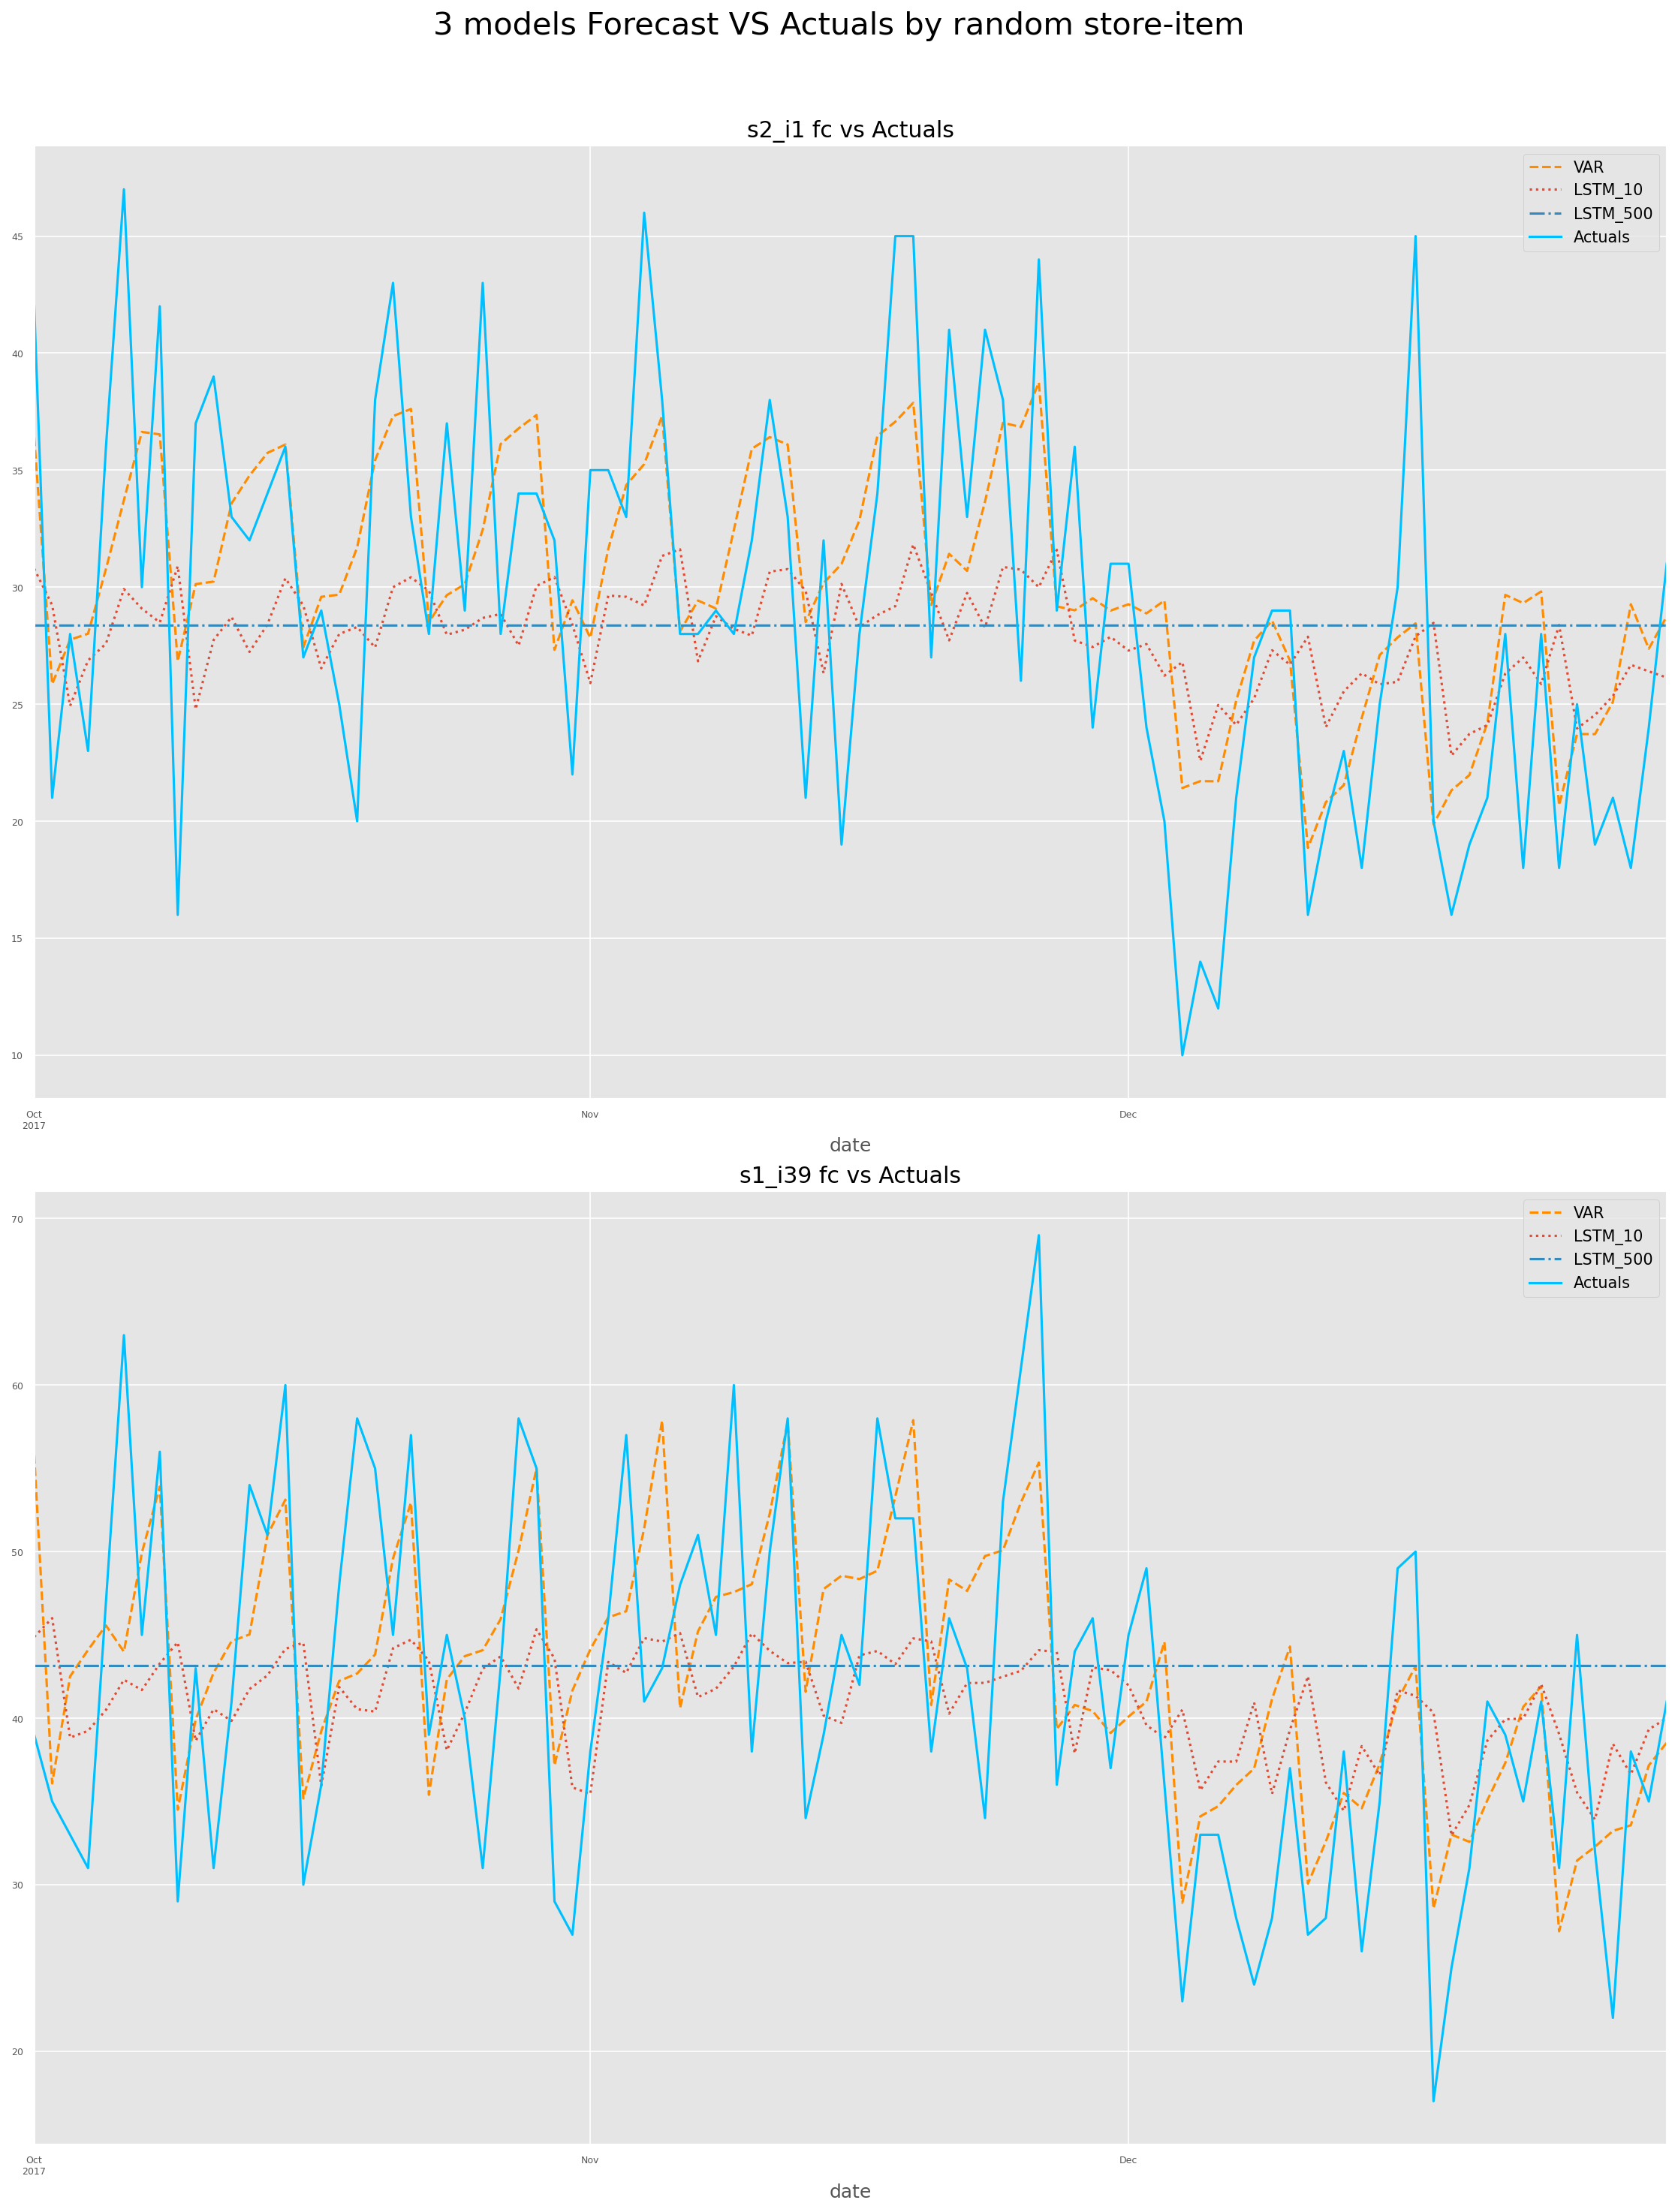

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=150, figsize=(15,20))

for i, ax in enumerate( axes.flatten()):
    VAR_fc[VAR_fc.columns[i]].plot(legend=True, ax=ax,linestyle='--',color='darkorange',label='VAR').autoscale(axis='x',tight=True)
    LSTM_10_fc[LSTM_10_fc.columns[i]].plot(legend=True, ax=ax,linestyle=':',label='LSTM_10').autoscale(axis='x',tight=True)
    LSTM_500_fc[LSTM_500_fc.columns[i]].plot(legend=True, ax=ax,linestyle='-.',label='LSTM_500').autoscale(axis='x',tight=True)
    true_data[true_data.columns[i]].plot(legend=True, ax=ax,color='deepskyblue',label='Actuals');
    ax.set_title( f'{true_data.columns[i]} fc vs Actuals')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)


fig.suptitle("3 models Forecast VS Actuals by random store-item", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.92);
plt.savefig('images/3_models_Forecast_VS_Actuals.png')

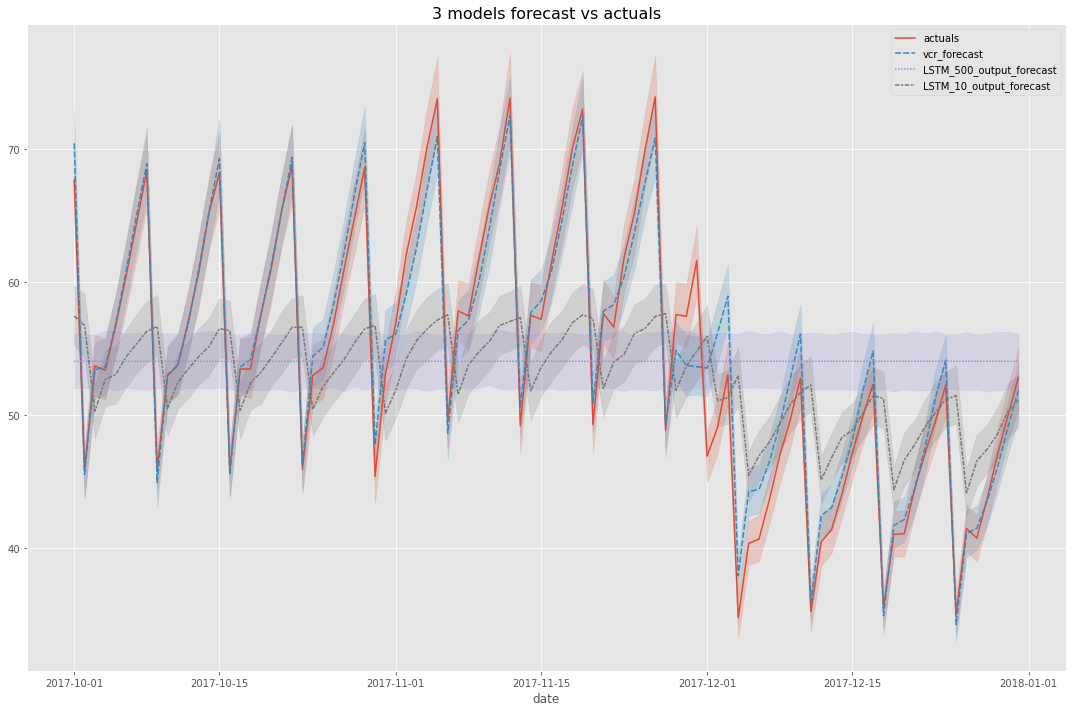

In [228]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.lineplot(data=comp_data)
ax.set_title('3 models forecast vs actuals',fontsize=16)

plt.tight_layout()
plt.savefig('images/3_models_forecast_vs_actuals.png')

In [236]:
comp_data[comp_data.columns[0]]

date
2017-10-01    21
2017-10-02    12
2017-10-03    18
2017-10-04    15
2017-10-05    20
              ..
2017-12-27    63
2017-12-28    59
2017-12-29    74
2017-12-30    62
2017-12-31    82
Name: actuals, Length: 46000, dtype: int64

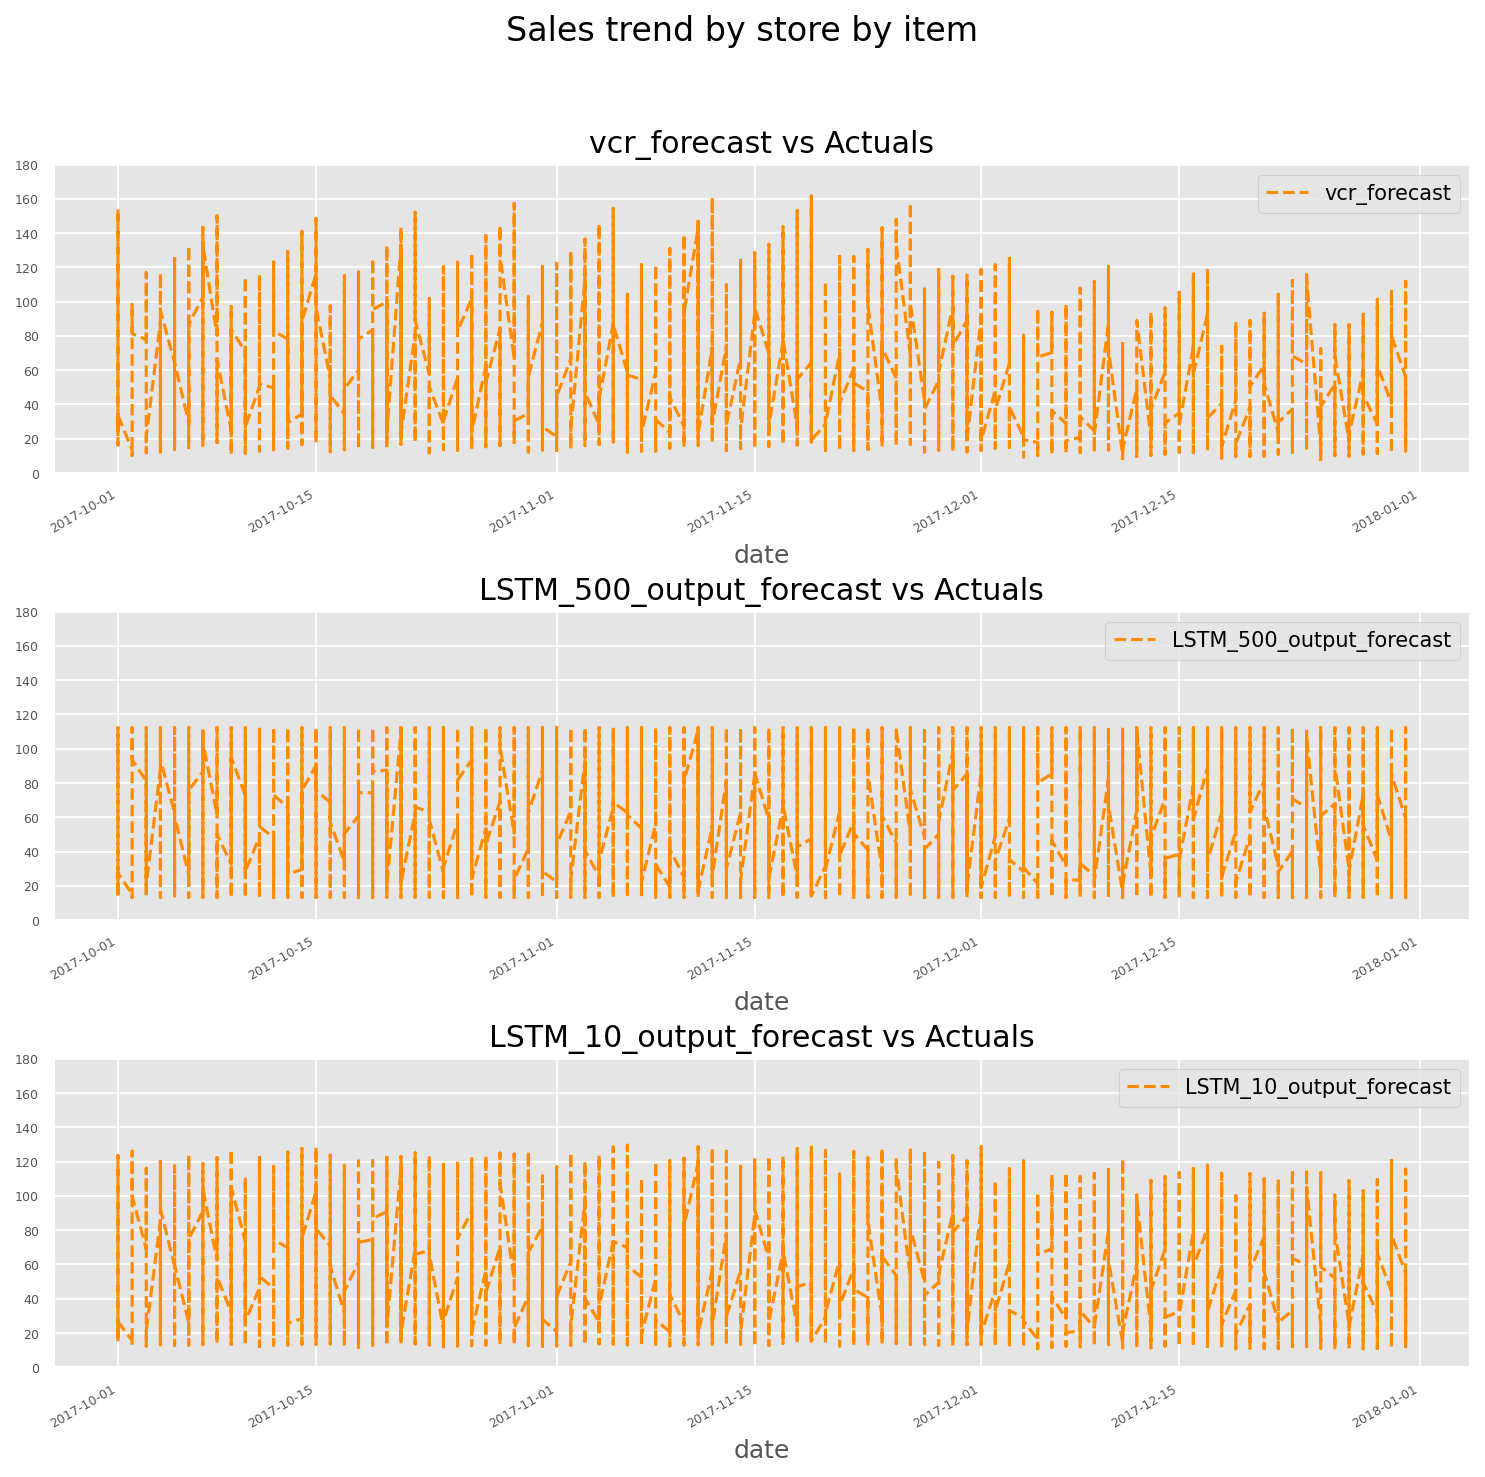

In [246]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10,10))

for i, ax in enumerate(axes.flatten()):
    comp_data[comp_data.columns[i+1]].plot(legend=True, ax=ax,linestyle='--',color='darkorange')
#     comp_data[comp_data.columns[0]].plot(legend=True, ax=ax,color='deepskyblue');
    
    
    ax.set_title( f'{comp_data.columns[i+1]} vs Actuals')
    ax.set_ylim(0,180)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
fig.suptitle("Sales trend by store by item", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88);
# plt.savefig('images/Sales_trend_by_store_by_item.png')

In [230]:
comp_data.head()

,actuals,vcr_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,
2017-10-01,21,28.298917,19.230562,21.983830
2017-10-02,12,17.481383,19.230562,21.253641
2017-10-03,18,21.455338,19.230562,19.590227
2017-10-04,15,22.685883,19.230562,20.462664
2017-10-05,20,22.080135,19.230562,20.195715


In [110]:
for i in range(4):
    print(comp_data.iloc[:,i].sum())

2515167
2532522.224208033
2486715.407408
2431333.8702765


In [111]:
comp_data.sum()

actuals                     2.515167e+06
vcr_forecast                2.532522e+06
LSTM_500_output_forecast    2.486715e+06
LSTM_10_output_forecast     2.431334e+06
dtype: float64

In [262]:
comp_data.shape[1]

4

In [118]:
rmse_lst =[th.rmse_calculate(comp_data.actuals,comp_data.iloc[:,i]) for i in range(4)]
rmse_lst

[0.0, 35.0, 35.31, 35.17]

In [169]:

df_rmses = pd.DataFrame({'names':comp_data.columns,'RMSE_or_mean':rmse_lst})

In [170]:
df_rmses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         4 non-null      object 
 1   RMSE_or_mean  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [171]:
df_rmses.iloc[0,:].shape

(2,)

In [172]:
df_rmses.iloc[0,0]='actuals_mean'
df_rmses.iloc[0,1]=valid.actuals.mean()


In [173]:
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,vcr_forecast,35.000000
2,LSTM_500_output_forecast,35.310000
3,LSTM_10_output_forecast,35.170000


In [186]:
df_rmses=df_rmses.sort_values(by='RMSE_or_mean', ascending=False)

In [213]:
df_rmses=df_rmses.reset_index(drop=True)
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,LSTM_500_output_forecast,35.310000
2,LSTM_10_output_forecast,35.170000
3,vcr_forecast,35.000000


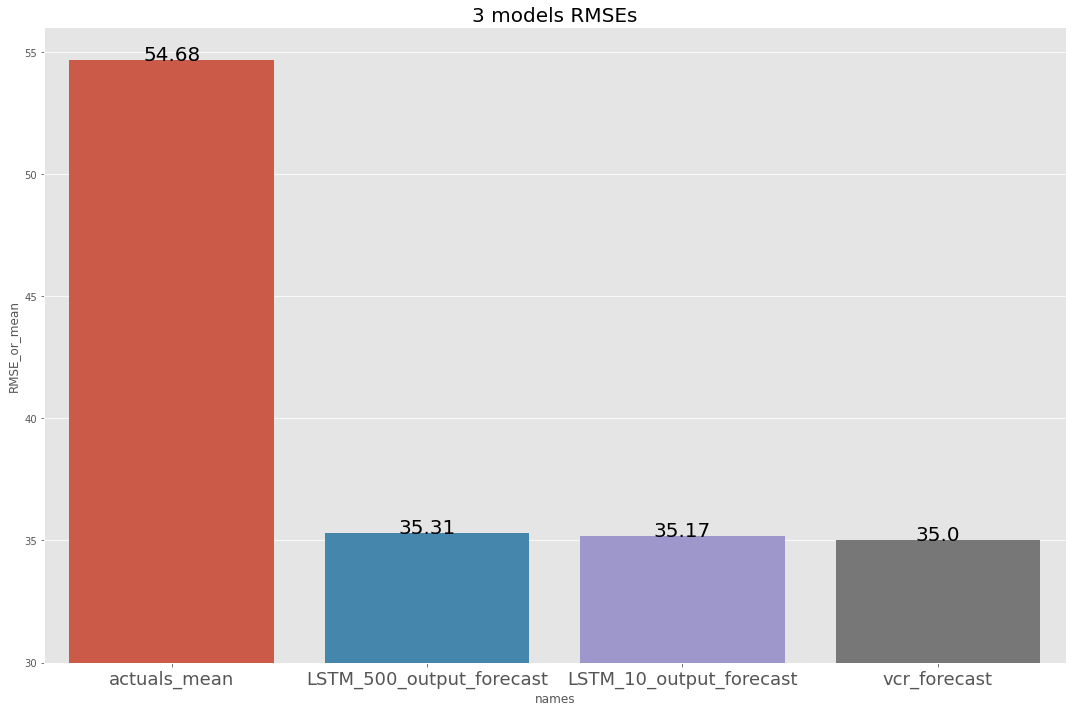

In [214]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data=df_rmses,x="names", y="RMSE_or_mean")
ax.set_ylim(30,56)
ax.set_title('3 models RMSEs',fontsize=20)
for index, row in df_rmses.iterrows():
    ax.text(row.name,row.RMSE_or_mean, round(row.RMSE_or_mean,2), color='black', ha="center",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tight_layout()
plt.savefig('images/3_models_RMSEs.png')

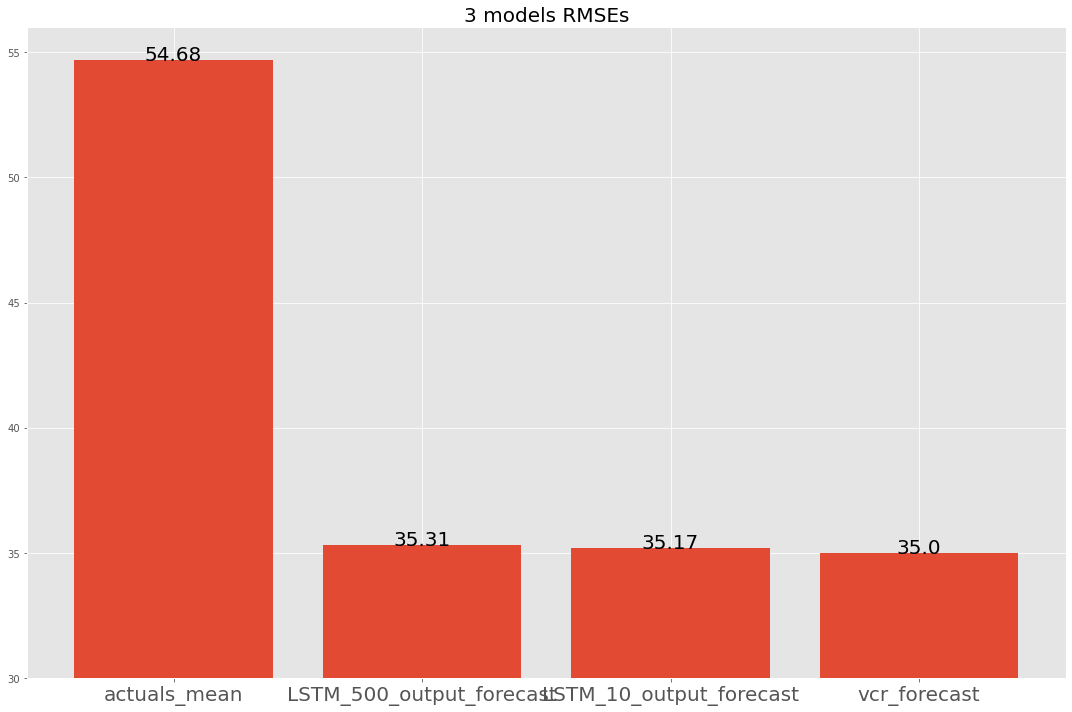

In [215]:
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(df_rmses.names, df_rmses.RMSE_or_mean)
ax.set_ylim(30,56)
ax.set_title('3 models RMSEs',fontsize=20)
for index, row in df_rmses.iterrows():
    ax.text(row.name,row.RMSE_or_mean, round(row.RMSE_or_mean,2), color='black', ha="center",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tight_layout()
# plt.savefig('images/3_models_RMSEs.png')